In [101]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [102]:
import pandas as pd
import numpy as np
dataFile = '/kaggle/input/heart-disease-prediction/public_datasets/Heart_disease_cleveland_new.csv'
df = pd.read_csv(dataFile)

In [103]:
TVAESynthesizer_datafile = '/kaggle/input/heart-disease-prediction/synthetic_datasets/TVAESynthesizer_dataset.csv'

In [104]:
df_TVAESynthesizer = pd.read_csv(TVAESynthesizer_datafile)

In [105]:
X=df.iloc[:,0:13]
X_TVAESynthesizer = df_TVAESynthesizer.iloc[:,0:13]
X_TVAESynthesizer

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,49,1,3,125,234,0,2,121,0,1.9,0,0,3
1,56,0,3,108,165,0,2,160,0,0.5,0,0,3
2,60,1,3,148,352,0,0,136,0,2.0,0,0,3
3,47,1,2,113,184,0,0,163,1,1.0,1,0,3
4,48,0,3,110,331,0,0,158,0,1.3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,1,1,119,257,0,0,165,0,0.5,0,1,2
996,57,1,3,129,226,0,0,122,0,3.8,0,0,1
997,54,1,2,145,252,0,2,179,0,0.2,0,2,1
998,49,1,2,132,154,0,2,174,0,0.6,0,0,1


In [106]:
y=df['target']
y_TVAESynthesizer = df_TVAESynthesizer['target']
y_TVAESynthesizer.value_counts()

target
0    571
1    429
Name: count, dtype: int64

In [107]:
df.skew(axis = 0)

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.208791
thal        0.342673
target      0.166406
dtype: float64

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.concat([X_train, X_TVAESynthesizer], ignore_index=True)
y_train = pd.concat([y_train, y_TVAESynthesizer], ignore_index=True)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,29,1,1,130,204,0,2,202,0,0.0,0,0,1
1,57,1,2,150,126,1,0,173,0,0.2,0,1,3
2,69,1,0,160,234,1,2,131,0,0.1,1,1,1
3,65,0,2,160,360,0,2,151,0,0.8,0,0,1
4,52,1,3,108,233,1,0,147,0,0.1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,60,1,3,108,267,0,0,150,0,0.0,1,0,1
1238,56,1,3,119,235,0,0,179,0,0.0,0,0,1
1239,65,1,3,134,274,0,2,183,0,0.0,0,0,1
1240,55,1,3,127,281,0,2,144,0,0.1,1,0,1


# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression(solver='lbfgs', max_iter=10000)
logModel.fit(X_train, y_train)
y_pred = logModel.predict(X_test)

Confusion Matrix:


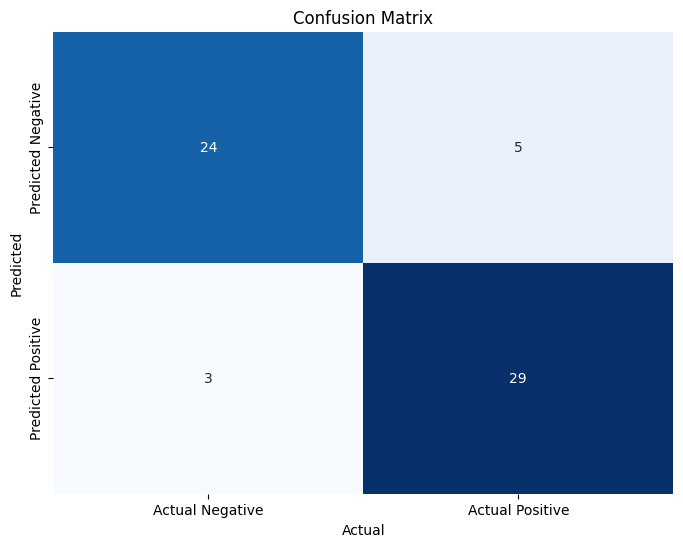

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [110]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# SVM Classifier

In [111]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# from sklearn.metrics import confusion_matrix
# cm_test = confusion_matrix(y_pred, y_test)

# y_pred_train = classifier.predict(X_train)
# cm_train = confusion_matrix(y_pred_train, y_train)

# print()
# print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
# print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Confusion Matrix:


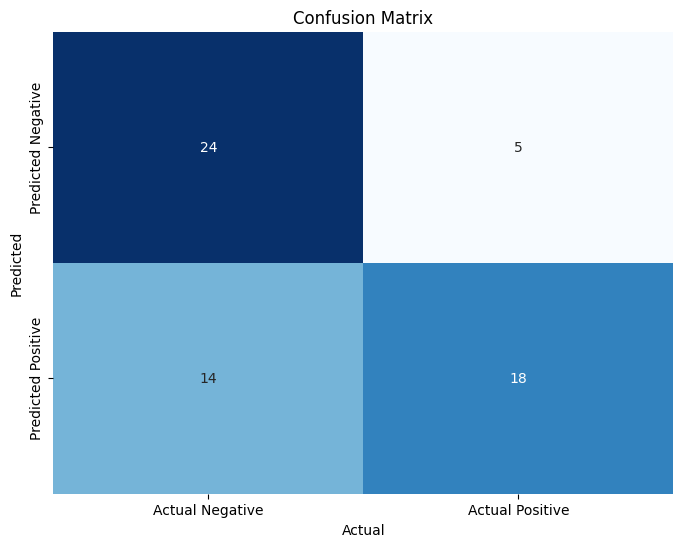

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.83      0.72        29
           1       0.78      0.56      0.65        32

    accuracy                           0.69        61
   macro avg       0.71      0.70      0.69        61
weighted avg       0.71      0.69      0.68        61



In [112]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Random Forest Classification

In [113]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix:


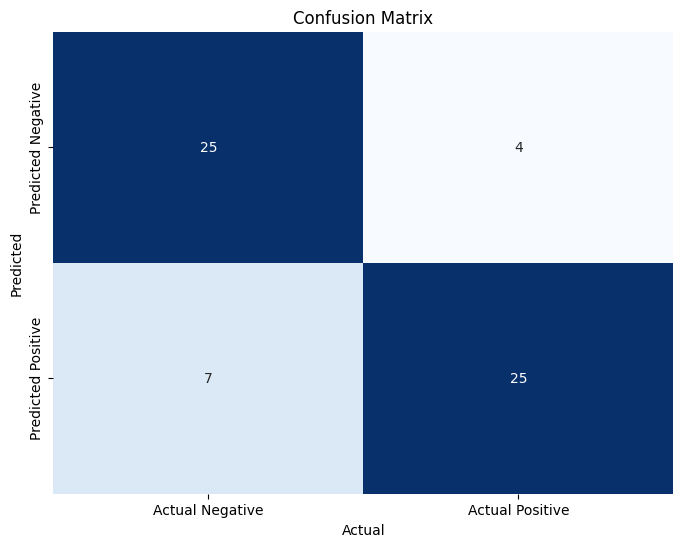

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [114]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Naive Bayes Classification

In [115]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)


Confusion Matrix:


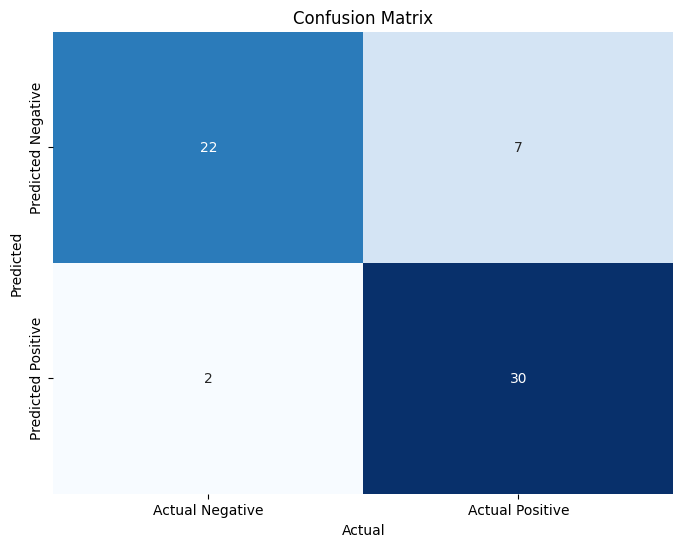

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.81      0.94      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [116]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Decision Tree Classifier

In [117]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix:


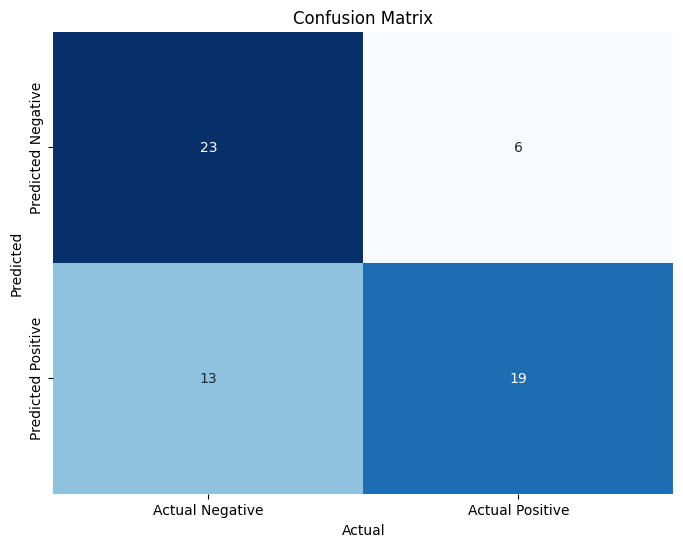

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.79      0.71        29
           1       0.76      0.59      0.67        32

    accuracy                           0.69        61
   macro avg       0.70      0.69      0.69        61
weighted avg       0.70      0.69      0.69        61



In [118]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Light GBM

In [119]:
import warnings

# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [120]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 1242, number of used features: 13
[LightGBM] [Info] Start training from score 0.431562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Confusion Matrix:


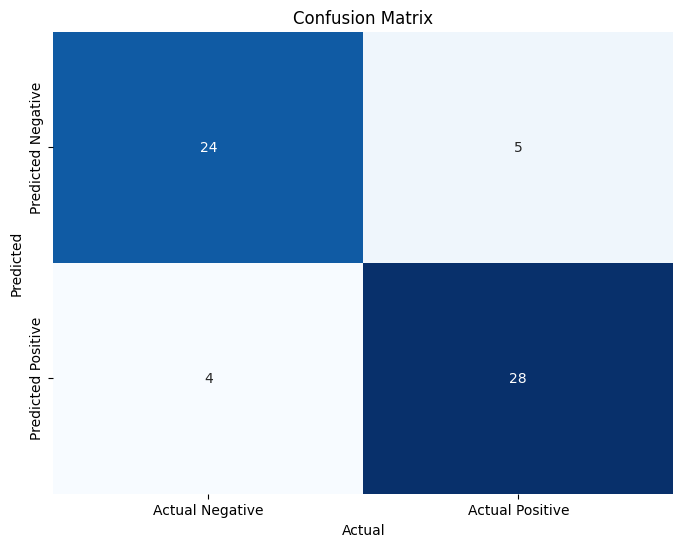

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [121]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# XGboost Classification

In [122]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

Confusion Matrix:


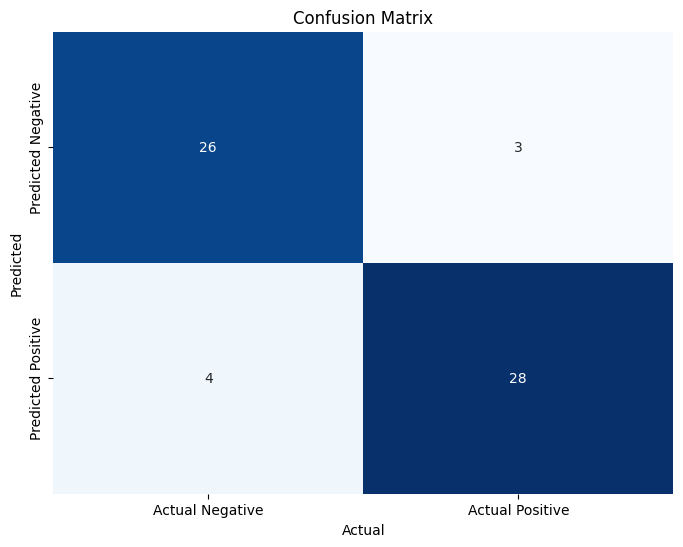

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [123]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Neural Network Classifier

In [124]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                      alpha=0.0001, batch_size='auto', learning_rate='constant', 
                      learning_rate_init=0.001, max_iter=200, shuffle=True, 
                      random_state=None, tol=0.0001, verbose=False, 
                      warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                      early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
                      beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, 
                      max_fun=15000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Confusion Matrix:


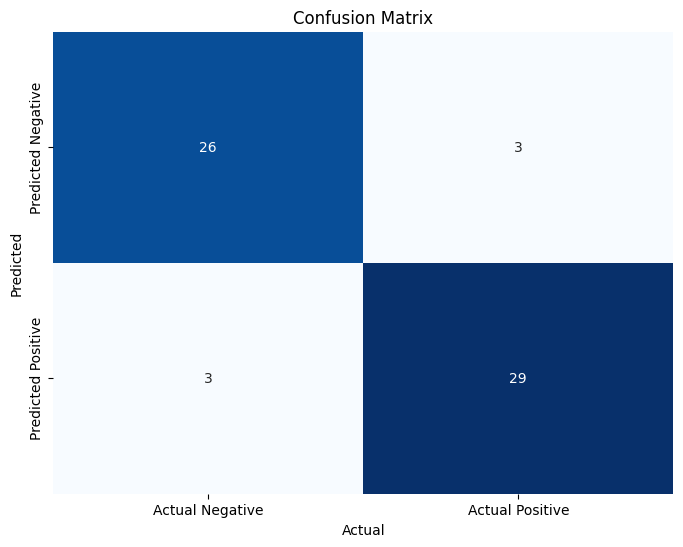

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [125]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)